In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Chargement des bases créées par Axel et Rémi

In [2]:
df_reponses = pd.read_pickle("../data/df_reponses.pkl")
df_text = pd.read_pickle("../data/dummies_text.pkl")
reponses=df_reponses.columns
text=df_text.columns

## Création d'une base qui joint les 2 précédentes

In [3]:
df = df_reponses.join(df_text)

## Création des matrices de corrélation et visualisation des matrices de corrélation

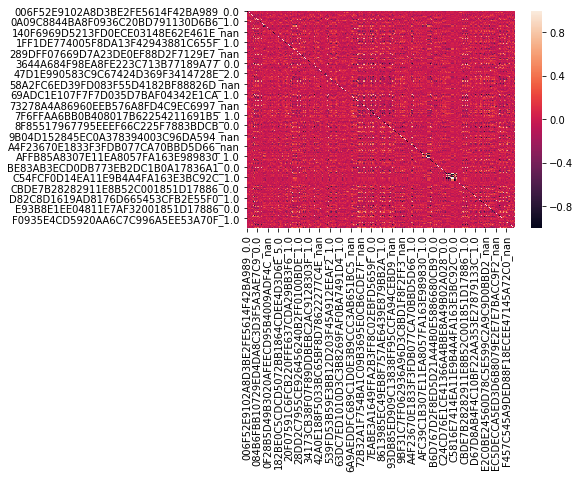

In [4]:
corr_reponses = df_reponses.corr()
sns.heatmap(corr_reponses)

In [9]:
corr_reponses.shape
def comptage_corr_rep(x):
    compteur=0
    for i in range(775):
        for j in range(775):
            if corr_reponses.iloc[i,j]>= x:
                compteur=compteur+1
    return compteur
cr1=comptage_corr_rep(0.1)
cr5=comptage_corr_rep(0.5)
cr75=comptage_corr_rep(0.75)
cr9=comptage_corr_rep(0.9)
print(cr1,cr5,cr75,cr9)

92051 6971 3075 1101


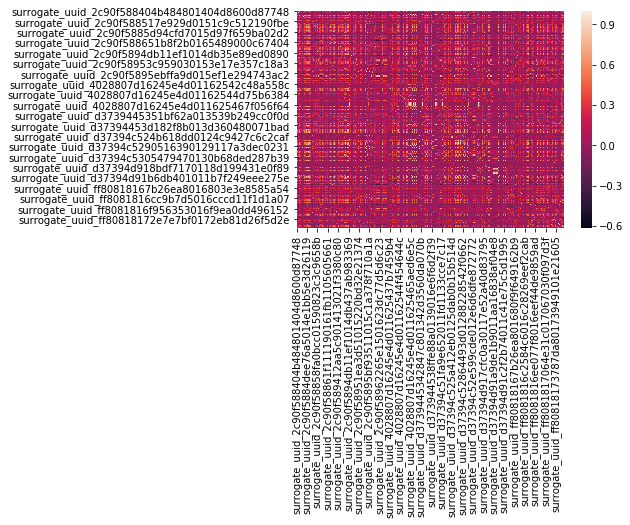

In [11]:
corr_text = df_text.corr()
sns.heatmap(corr_text)

In [12]:
corr = df.corr()

In [13]:
corr.drop(reponses,inplace=True)

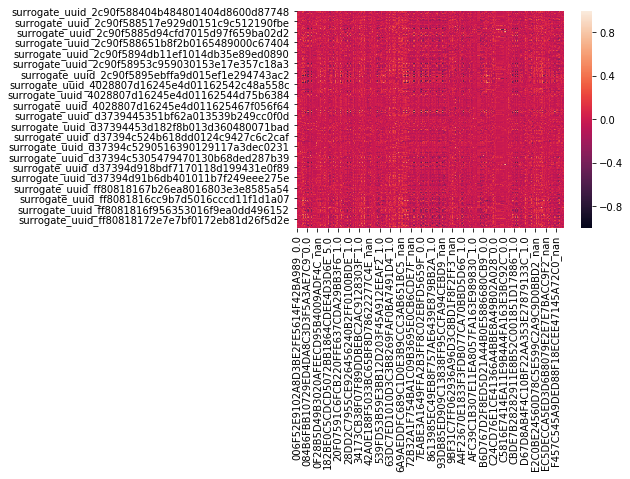

In [14]:
corr.drop(text,axis=1, inplace=True)
sns.heatmap(corr)

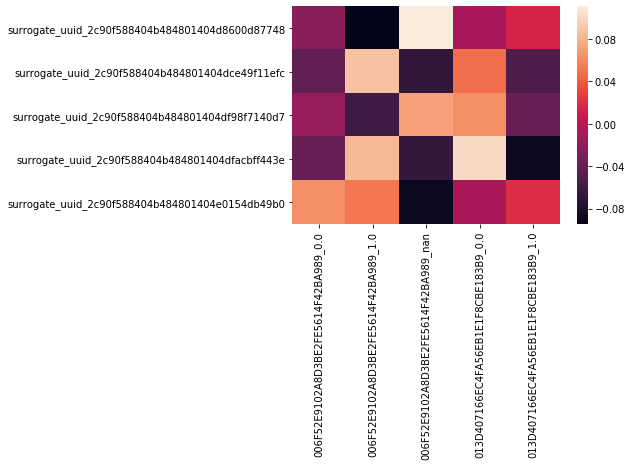

In [15]:
sns.heatmap(corr.iloc[:5,:5])

In [16]:
corr.shape

(3199, 775)

In [35]:
corr=corr.transpose()

# Etude plus profonde sur la relation entre réponses et textes

In [36]:
#Définition d'une fonction qui compte le nombre de coeff qui est supérieur à un certain seuil

#Idée : stocker aussi les textes et rep qui correspondent à ces coeffs pour ensuite les étudier en détail
def comptage(x):
    compteur=0
    for i in range(775):
        for j in range(3199):
            if np.abs(corr.iloc[i,j])>= x:
                compteur=compteur+1
    return compteur
c5=comptage(0.5)
c6=comptage(0.6)
c65=comptage(0.65)
c7=comptage(0.7)
c8=comptage(0.8)
print(c5,c6,c65,c7,c8)

KeyboardInterrupt: 

##### On se concentre sur les réponses qui ont un coefficient de corrélation moyen (sur l'ensemble des textes) que l'on juge assez élevé

In [32]:
moyenne=corr.mean()
def comptage_mean(x):
    compteur=0
    for j in range(775):
        if moyenne[j]>= np.abs(x):
             compteur=compteur+1
    return compteur
comptage_mean(0)
#On remarque que peu de réponse ont un coeff de corr moyen élevé (le max est de 0.115)

372

In [20]:
corr.head()

,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,02E74F10E0327AD868D138F2B4FDD6F0_0.0,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
surrogate_uuid_2c90f588404b484801404d8600d87748,-0.023807,-0.094411,0.110899,-0.009307,0.015211,-0.015984,-0.032366,-0.030890,0.101830,0.028107,...,-0.025655,-0.024185,-0.048606,0.058783,-0.007060,0.010792,-0.012548,0.041292,-0.045735,-0.002091
surrogate_uuid_2c90f588404b484801404dce49f11efc,-0.042546,0.088653,-0.068070,0.047676,-0.052081,0.013429,0.062584,-0.064128,0.016603,-0.005421,...,-0.079645,-0.044833,0.019678,0.007389,-0.064773,0.079776,-0.051730,0.070264,0.003508,-0.076057
surrogate_uuid_2c90f588404b484801404df98f7140d7,-0.017416,-0.059314,0.071040,0.062808,-0.039185,-0.060255,-0.006788,0.049129,-0.074498,0.017592,...,0.213605,-0.079274,-0.056975,0.097980,0.111724,-0.083042,-0.090513,0.075901,-0.051272,-0.033077
surrogate_uuid_2c90f588404b484801404dfacbff443e,-0.039100,0.084400,-0.065585,0.100658,-0.089344,-0.026251,0.046625,-0.021771,-0.032456,0.046162,...,-0.042135,-0.039720,0.075276,-0.046976,0.070120,-0.063106,-0.020609,0.056367,0.004875,-0.062852
surrogate_uuid_2c90f588404b484801404e0154db49b0,0.062984,0.051741,-0.088528,-0.008063,0.019611,-0.030889,-0.062548,0.076620,-0.038190,-0.040792,...,0.001618,-0.046737,0.005618,0.021486,0.056285,-0.048316,-0.024250,-0.018180,0.014293,0.006129
